In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install cvxpy

In [ ]:
pip install wheel

In [ ]:
pip install gunicorn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS


from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/campus placement/ml-with-python-course-project 2/train.csv")

In [ ]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [ ]:
# check null values in df
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Dataset has 1 integer, 8 object and 6 float datatypes.
No other columns have missing values except salary column. There are 148 non-null values in salary column i.e. 67 null values which shows that 67 candidates weren't placed.
We can't drop these values as they give information on candidates who weren't placed.
Imputing values with mean/median would be very wrong because candidates who weren't placed can't get salary.
So we impute these values with 0.

Data Cleaning

In [ ]:
df = df.drop('sl_no',axis=1)

Imputing null values in Salary column with 0

In [ ]:
df['salary'].fillna(0,inplace=True)
df['salary'].isnull().sum()

0

Checking for outliers

Text(0.5, 1.0, 'MBA percentage')

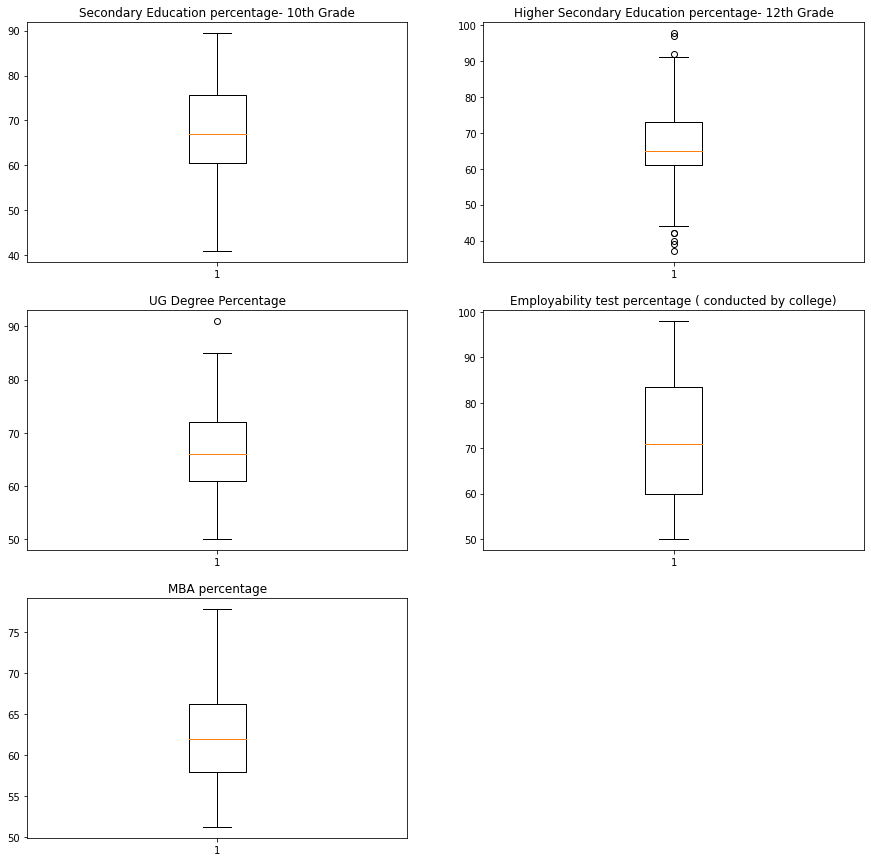

In [ ]:
plt.figure(figsize = (15, 15))

ax=plt.subplot(321)
plt.boxplot(df['ssc_p'])
ax.set_title('Secondary Education percentage- 10th Grade')

ax=plt.subplot(322)
plt.boxplot(df['hsc_p'])
ax.set_title('Higher Secondary Education percentage- 12th Grade')

ax=plt.subplot(323)
plt.boxplot(df['degree_p'])
ax.set_title('UG Degree Percentage')

ax=plt.subplot(324)
plt.boxplot(df['etest_p'])
ax.set_title('Employability test percentage ( conducted by college)')

ax=plt.subplot(325)
plt.boxplot(df['mba_p'])
ax.set_title('MBA percentage')

Here we can see that only hsc_p column has outliers.

In [ ]:
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1   

df[(df['hsc_p'] <= Q1 - 1.5 * IQR) | (df['hsc_p'] >= Q3 + 1.5 *IQR)]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
24,0,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
42,0,49.00,Others,39.00,Central,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed,0.0
49,1,50.00,Others,37.00,Others,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed,0.0
120,0,58.00,Others,40.00,Others,Science,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed,0.0
134,1,77.44,Central,92.00,Others,Commerce,72.00,Comm&Mgmt,Yes,94.00,Mkt&Fin,67.13,Placed,250000.0
169,0,59.96,Others,42.16,Others,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,Not Placed,0.0
177,1,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
206,0,41.00,Central,42.00,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0


Handling with Catagorical Data

In [ ]:
# we convert object type data into numerical datatype
    

df['status']=df['status'].astype('category')
df['workex']=df['workex'].astype('category')
df['hsc_b']=df['hsc_b'].astype('category')
df['ssc_b']=df['ssc_b'].astype('category')

In [ ]:
#check how many unique data in these dataframe

print(df['gender'].unique())
print(df['status'].unique())
print(df['workex'].unique())
print(df['hsc_b'].unique())
print(df['ssc_b'].unique())

[0 1]
['Placed', 'Not Placed']
Categories (2, object): ['Placed', 'Not Placed']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['Others', 'Central']
Categories (2, object): ['Others', 'Central']
['Others', 'Central']
Categories (2, object): ['Others', 'Central']


In [ ]:
# Replace the value in 0,1 or quantitative parameters

df["status"].replace(['Placed',"Not Placed"],[1,0],inplace=True)

df['workex'].replace(to_replace ="Yes", value =1,inplace=True) 
df['workex'].replace(to_replace ="No", value =0,inplace=True)

In [ ]:
df["gender"].dtype

dtype('int64')

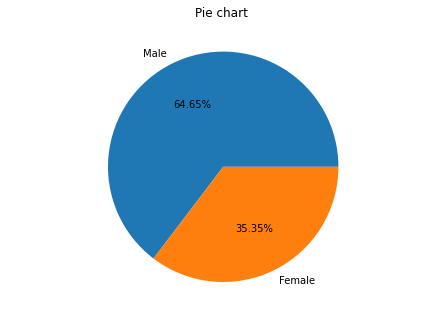

In [ ]:
# show the percentage of male or female
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
gender = ['Male','Female']
students = [139,76]
ax.pie(students, labels = gender,autopct='%1.2f%%',colors = ["#1f77b4", "#ff7f0e"])
plt.title('Pie chart ')
plt.show()

Number of not placed Student 67
Number of placed Student 0


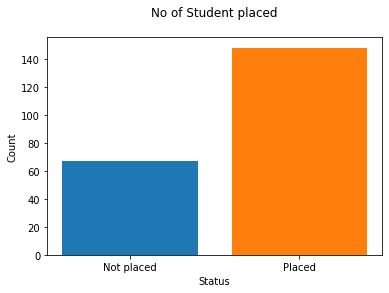

In [ ]:
#show the no. of student how placed or not placed.

print("Number of not placed Student "+ str(len(df[df["status"]==0])))
print("Number of placed Student "+ str(len(df[df["status"]=="Placed"])))

plt.bar([0],height=len(df[df["status"]==0]))
plt.bar([1],height=len(df[df["status"]==1]))

plt.xlabel("Status")
plt.ylabel("Count")

plt.xticks(np.arange(2), ('Not placed', 'Placed'))
plt.title("No of Student placed\n")
plt.show()

scc_p mean = 67.3033953488372
hsc_p mean = 66.33316279069766
mba_p mean = 62.278186046511586
degree_p mean = 66.37018604651163


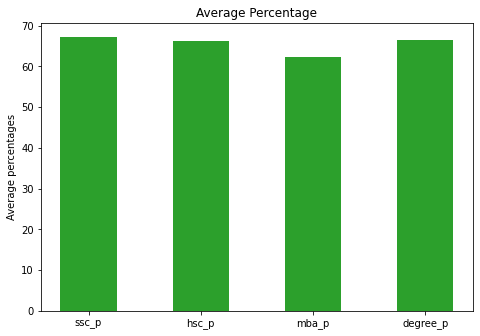

In [ ]:
#average percentage of all education qualification
values = [(df['ssc_p'].mean()),(df['hsc_p'].mean()),(df['mba_p'].mean()),(df['degree_p'].mean())]
print('scc_p mean = ' +str(df['ssc_p'].mean()))
print('hsc_p mean = ' +str(df['hsc_p'].mean()))
print('mba_p mean = ' +str(df['mba_p'].mean()))
print('degree_p mean = ' +str(df['degree_p'].mean()))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['ssc_p','hsc_p','mba_p','degree_p']
ax.set_ylabel('Average percentages')
ax.set_title('Average Percentage')
ax.bar(names,values,width = 0.5,color=["#2ca02c"])
plt.show()

Which factor influenced a candidate in getting placed?
or

Does percentage matters for one to get placed?

In [ ]:
#show the relation between diffrent qualification placement status usinng correlation.

print('ssc_p to placement ', round(df['status'].corr(df['ssc_p'])*100,1),'%')
print('hsc_p to placement ', round(df['status'].corr(df['hsc_p'])*100,1),'%')
print('mba_p to placement ', round(df['status'].corr(df['mba_p'])*100,1),'%')
print('degree_p to placement ', round(df['status'].corr(df['degree_p'])*100,1),'%')
print('etest_p to placement ', round(df['status'].corr(df['etest_p'])*100,1),'%')

print('workexp to placement ', round(df['status'].corr(df['workex'])*100,1),'%')

ssc_p to placement  60.8 %
hsc_p to placement  49.1 %
mba_p to placement  7.7 %
degree_p to placement  48.0 %
etest_p to placement  12.8 %
workexp to placement  27.6 %


In [ ]:
df_grade = df.groupby(['status']).mean()[['hsc_p', 'degree_p', 'mba_p']].reset_index()
df_grade.head()

,status,hsc_p,degree_p,mba_p
0,0,58.395522,61.134179,61.612836
1,1,69.926554,68.740541,62.579392


specialisation in Mkt&Fin 120
specialisation in Mkt&HR 95


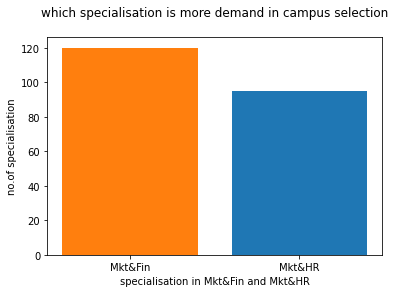

In [ ]:
# which specialisation is more demand in campus selection

plt.bar([1],height=len(df[df["specialisation"]=="Mkt&HR"]))
plt.bar([0],height=len(df[df["specialisation"]=="Mkt&Fin"]))
plt.xlabel("specialisation in Mkt&Fin and Mkt&HR")
plt.ylabel("no.of specialisation")

print("specialisation in Mkt&Fin "+ str(len(df[df["specialisation"]=="Mkt&Fin"])))
print("specialisation in Mkt&HR "+ str(len(df[df["specialisation"]=="Mkt&HR"])))
plt.xticks(np.arange(2), ('Mkt&Fin', 'Mkt&HR'))
plt.title("which specialisation is more demand in campus selection\n")
plt.show()

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,0.0
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,0,91.0,Mkt&Fin,74.49,1,400000.0
211,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,0,74.0,Mkt&Fin,53.62,1,275000.0
212,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,1,59.0,Mkt&Fin,69.72,1,295000.0
213,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,0,70.0,Mkt&HR,60.23,1,204000.0


DATA PREPROCESSING

Label Encoding (for the categorical columns having only two types of classes)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['workex','specialisation','status','ssc_b','hsc_b']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,0,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,0,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,0,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,0,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


One-hot Encoding (for categorical columns having more than two types of classes)

In [ ]:
dummy_hsc_s=pd.get_dummies(df['hsc_s'],prefix='hsc')
dummy_degree_t=pd.get_dummies(df['degree_t'],prefix='degree')

df1=pd.concat([df,dummy_hsc_s,dummy_degree_t],axis=1)
df1.drop(['hsc_s','degree_t','hsc_b','ssc_b','hsc_s','degree_t'],axis=1,inplace=True)
df1.head(10)

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_Arts,hsc_Commerce,hsc_Science,degree_Comm&Mgmt,degree_Others,degree_Sci&Tech
0,0,67.00,91.00,58.00,0,55.00,1,58.80,1,270000.0,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,86.50,0,66.28,1,200000.0,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,75.00,0,57.80,1,250000.0,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,66.00,1,59.43,0,0.0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,96.80,0,55.50,1,425000.0,0,1,0,1,0,0
5,0,55.00,49.80,67.25,1,55.00,0,51.58,0,0.0,0,0,1,0,0,1
6,1,46.00,49.20,79.00,0,74.28,0,53.29,0,0.0,0,1,0,1,0,0
7,0,82.00,64.00,66.00,1,67.00,0,62.14,1,252000.0,0,0,1,0,0,1
8,0,73.00,79.00,72.00,0,91.34,0,61.29,1,231000.0,0,1,0,1,0,0
9,0,58.00,70.00,61.00,0,54.00,0,52.21,0,0.0,0,1,0,1,0,0


In [ ]:
df1.to_csv("/content/drive/MyDrive/campus placement/ml-with-python-course-project 2/preprocess_data.csv")

In [ ]:
df1

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_Arts,hsc_Commerce,hsc_Science,degree_Comm&Mgmt,degree_Others,degree_Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,1,58.80,1,270000.0,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,86.5,0,66.28,1,200000.0,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,75.0,0,57.80,1,250000.0,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,66.0,1,59.43,0,0.0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,96.8,0,55.50,1,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,77.60,0,91.0,0,74.49,1,400000.0,0,1,0,1,0,0
211,0,58.00,60.00,72.00,0,74.0,0,53.62,1,275000.0,0,0,1,0,0,1
212,0,67.00,67.00,73.00,1,59.0,0,69.72,1,295000.0,0,1,0,1,0,0
213,1,74.00,66.00,58.00,0,70.0,1,60.23,1,204000.0,0,1,0,1,0,0
